<a href="https://colab.research.google.com/github/Robertkevin96/cs480student/blob/main/01/CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

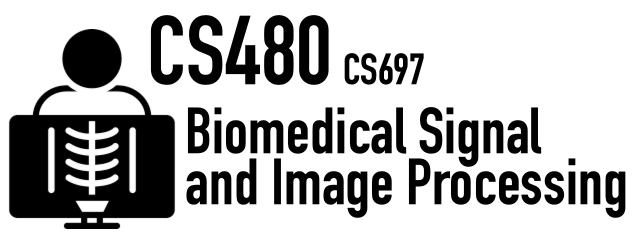
# Assignment 1


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [ ]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [ ]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

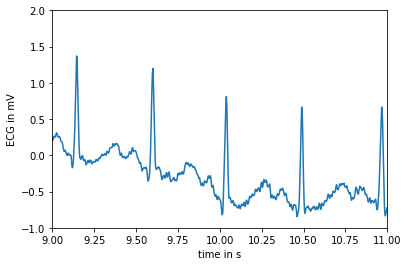

In [ ]:
time = np.arange(ecg.size) / SAMPLING_RATE
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(9, 11)
plt.ylim(-1, 2)
plt.show()

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 1.1 MB 3.7 MB/s 


In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


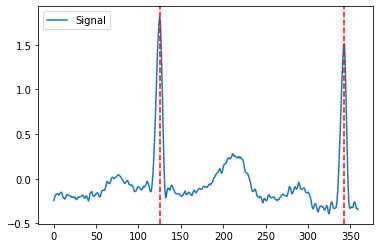

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

In [ ]:
ecg_df = pd.DataFrame(columns=["time","ecg"])
ecg_df["time"]=time
ecg_df["ecg"]=ecg

In [ ]:
_, new_rpeaks = nk.ecg_peaks(ecg_df[(ecg_df.time>=8.9)&(ecg_df.time<=12)].ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
new_rpeaks

{'ECG_R_Peaks': array([252, 410, 572, 744, 925]), 'sampling_rate': 360}

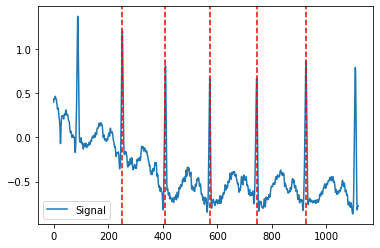

In [ ]:
plot = nk.events_plot(new_rpeaks['ECG_R_Peaks'], ecg_df[(ecg_df.time>=8.9)&(ecg_df.time<=12)].ecg.values)

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [ ]:
ecg_df["rpeaks"]=0

In [ ]:
ecg_df.loc[rpeaks['ECG_R_Peaks'],"rpeaks"]=1

In [ ]:
ecg_df.rpeaks.value_counts()

0    107497
1       503
Name: rpeaks, dtype: int64

### Consider entire data

In [ ]:
signals, info = nk.ecg_process(ecg, sampling_rate=360)

In [ ]:
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

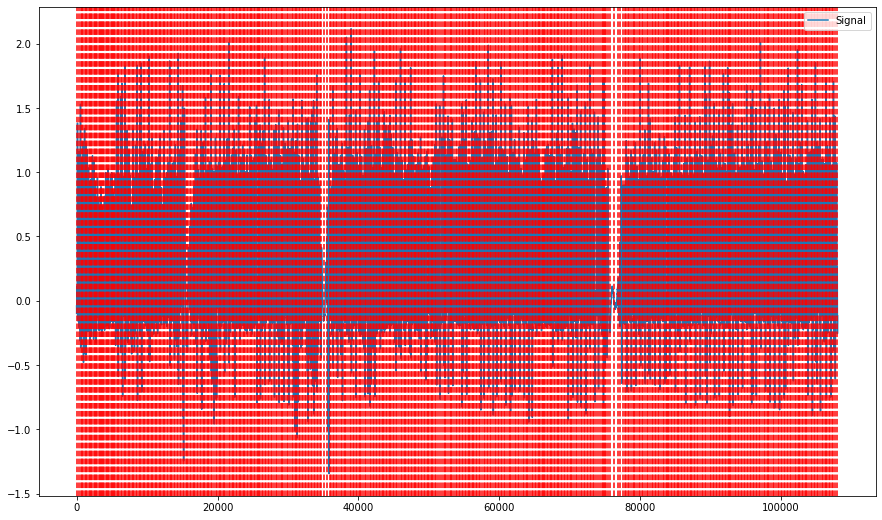

In [ ]:
plt.rcParams['figure.figsize'] = [15, 9]
plot = nk.events_plot(rpeaks, cleaned_ecg)


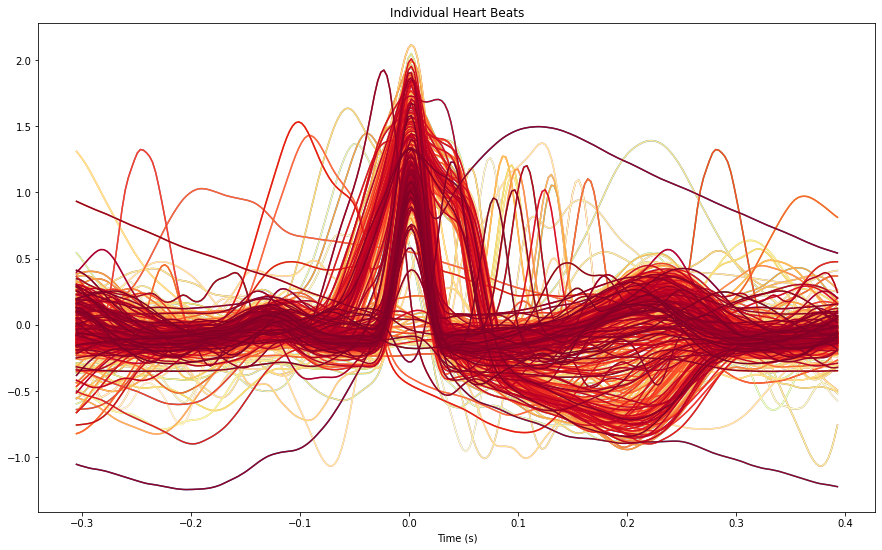

In [ ]:
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=360, show=True)

### Consider sample data between  9 to 11 secs

In [ ]:
signals, info = nk.ecg_process(ecg_df[(ecg_df.time>=8.9)&(ecg_df.time<=12)].ecg.values, sampling_rate=360)

In [ ]:
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

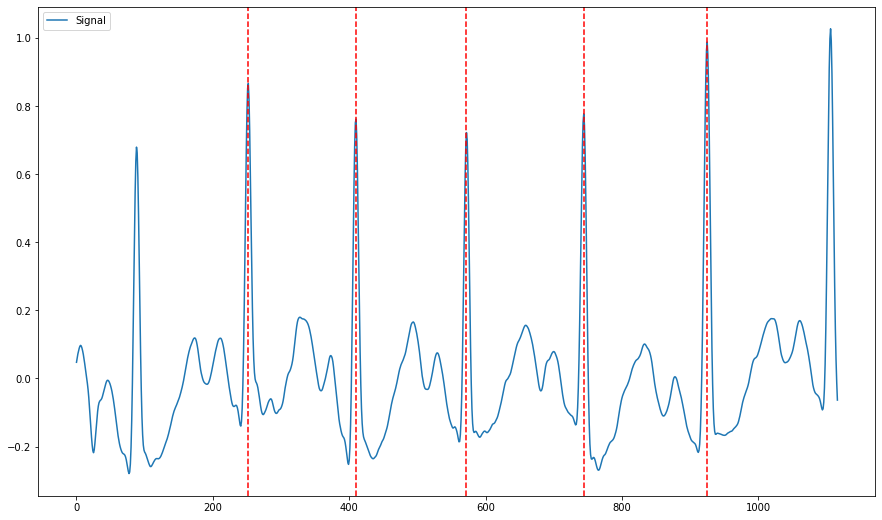

In [ ]:
plt.rcParams['figure.figsize'] = [15, 9]
plot = nk.events_plot(rpeaks, cleaned_ecg)


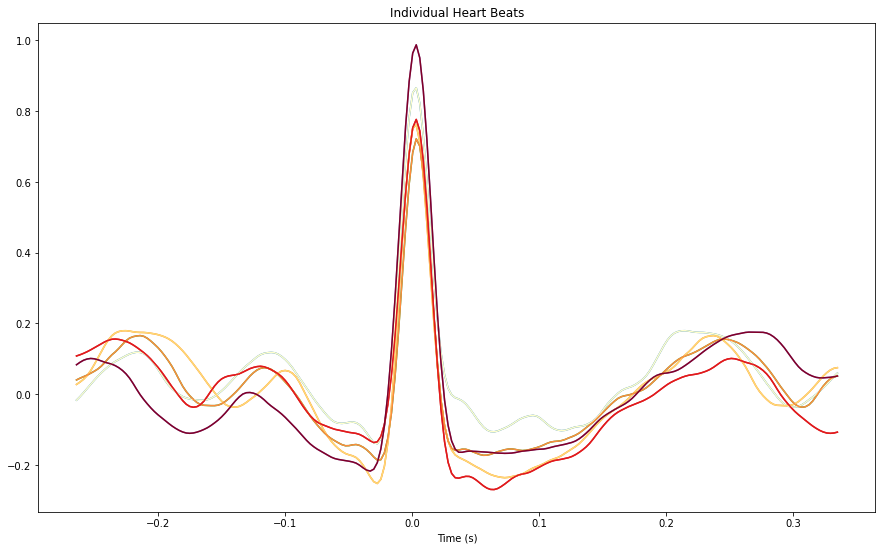

In [ ]:
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=360, show=True)

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [ ]:
_, waves_peak = nk.ecg_delineate(ecg_df[(ecg_df.time>=8.9)&(ecg_df.time<=12)].ecg, new_rpeaks, sampling_rate=360, method="peak")

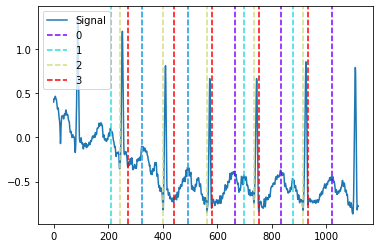

In [ ]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_df[(ecg_df.time>=8.9)&(ecg_df.time<=12)].ecg.values)

In [ ]:
# TODO Does the detection work well?

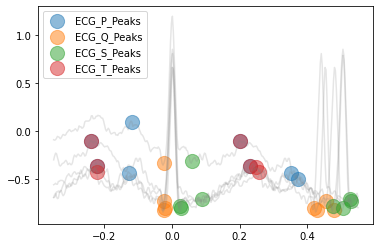

In [ ]:
_, waves_peak = nk.ecg_delineate(ecg_df[(ecg_df.time>=8.9)&(ecg_df.time<=12)].ecg, new_rpeaks, sampling_rate=360, method="peak", show=True, show_type='peaks')

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

In [ ]:
plt.rcParams['figure.figsize'] = [15, 9]

In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=1000)

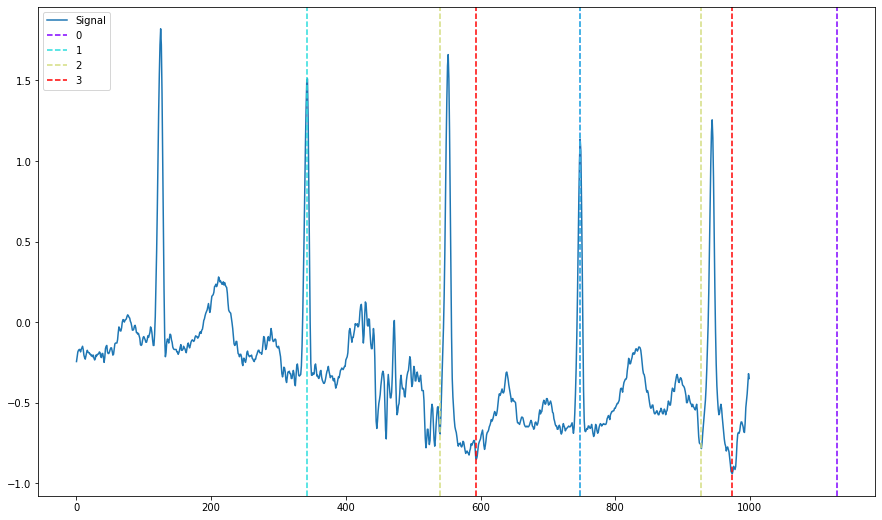

In [ ]:
_, waves_peak = nk.ecg_delineate(ecg, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][0:2],
                       waves_peak['ECG_P_Peaks'][0:2],
                       waves_peak['ECG_Q_Peaks'][0:2],
                       waves_peak['ECG_S_Peaks'][0:2]], ecg[0:1000])

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

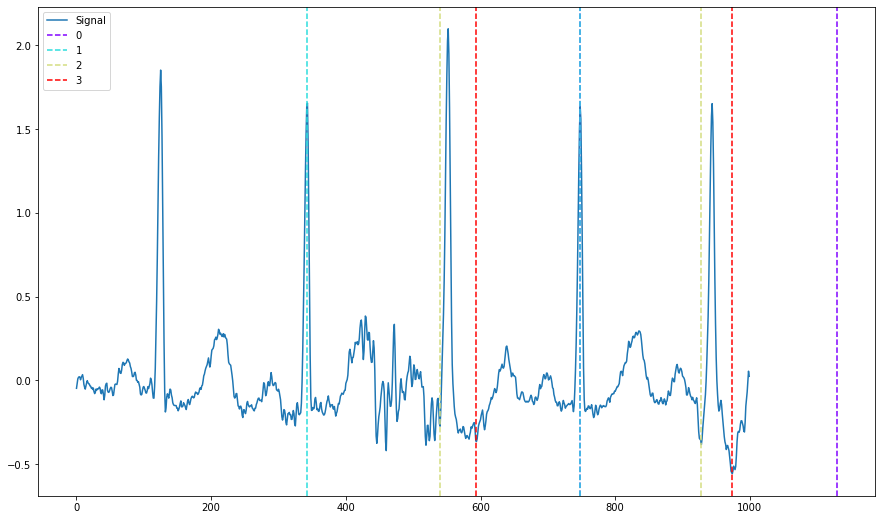

In [ ]:
clean_df = nk.signal_filter(ecg,lowcut=2)
_, waves_peak = nk.ecg_delineate(clean_df, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][0:2],
                       waves_peak['ECG_P_Peaks'][0:2],
                       waves_peak['ECG_Q_Peaks'][0:2],
                       waves_peak['ECG_S_Peaks'][0:2]], clean_df[0:1000])

In [ ]:
# TODO Does the filtering improve the result?

In [ ]:
Yes, we can find a difference in the filters when we consider the lowcut value as 2.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#